In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from PIL import Image

In [2]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

In [7]:
#Question 1
image = Image.open("dogs.jpeg")
np_array = np.array(image)

print("Array shape:",np_array.shape)


print("Dimensions of the Image")
print("Height: " + str(image.height))
print("Width: " + str(image.width))

Array shape: (185, 272, 3)
Dimensions of the Image
Height: 185
Width: 272


In [9]:
#Question 2
arr = np_array.ravel()
new_arr = arr.reshape(np_array.shape[0] * np_array.shape[1], np_array.shape[2])
new_arr

array([[240, 240, 240],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

In [10]:
#Question 3
kmean = KMeans(n_clusters=3)
kmean.fit(new_arr)

print("Cluster centroids:",kmean.cluster_centers_)


Cluster centroids: [[ 29.52558775  21.59168945  20.48217605]
 [251.4871407  247.6867877  243.16348966]
 [210.65606557 174.85483607 143.73803279]]


In [14]:
unique, counts = np.unique(kmean.labels_, return_counts=True)
print(dict(zip(unique, counts)))


df = pd.DataFrame(new_arr, columns=["col1", "col2", "col3"])
df["cluster"] = kmean.labels_
df

{0: 18291, 1: 19805, 2: 12224}


,col1,col2,col3,cluster
0,240,240,240,1
1,255,255,255,1
2,255,255,255,1
3,251,251,251,1
4,255,255,255,1
...,...,...,...,...
50315,254,254,254,1
50316,254,254,254,1
50317,254,254,254,1
50318,254,254,254,1


/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


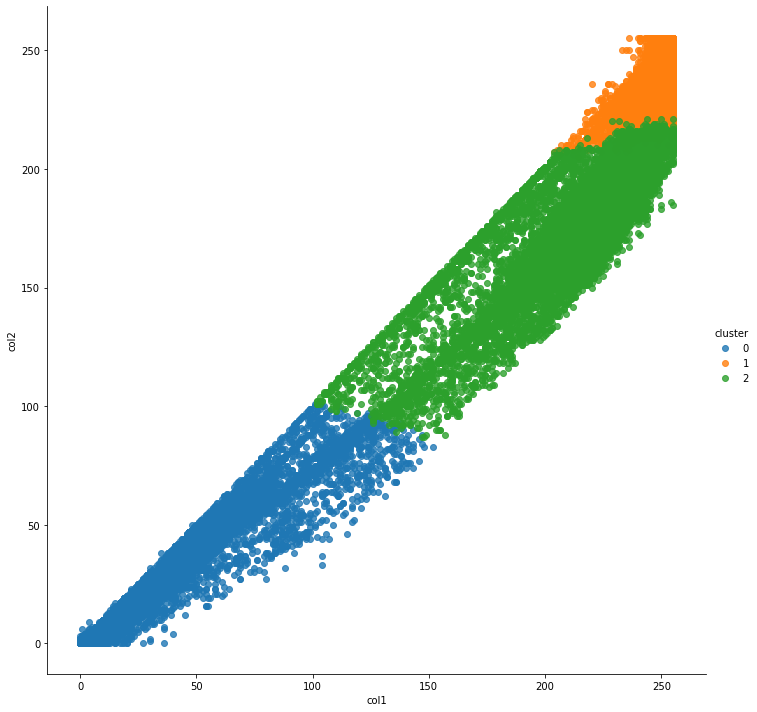

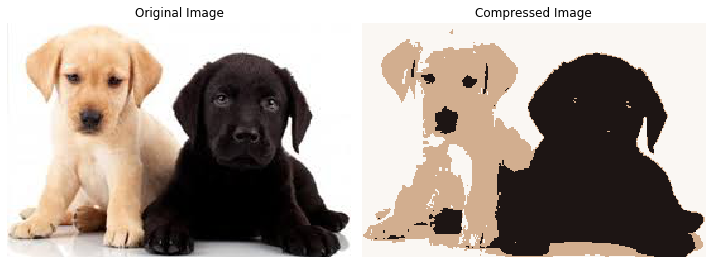

In [34]:
#Question 4
sns.lmplot('col1', 'col2', data=df, hue="cluster",
           size=10, aspect=1, fit_reg=False)

x_com= kmean.cluster_centers_[kmean.labels_]
x_com = np.clip(x_com.astype('uint8'), 0, 250)
x_com= x_com.reshape(
    np_array.shape[0], np_array.shape[1], np_array.shape[2])


fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(x_com)
ax[1].set_title('Compressed Image')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

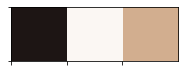

In [37]:
#Question 5
Ccolor = kmean.cluster_centers_.astype(int)
colors = [rgb_to_hex(color) for color in Ccolor]

sns.palplot(colors)
plt.show()